In [ ]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt

%pylab inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-qfn05bmc
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-qfn05bmc
  Resolved https://github.com/PYFTS/pyFTS to commit 4c77ecc73fa0888132ac3996ca7e1f519dcf2fc8
  Preparing metadata (setup.py) ... done
  Created wheel for pyFTS: filename=pyFTS-1.7-py3-none-any.whl size=217892 sha256=8cc3f2a3d5618e37a5aa5b0896a3c7d9890c6e02e765d1c262e3240a85a7762d
  Stored in directory: /tmp/pip-ephem-wheel-cache-hvl4c21s/wheels/7f/25/75/dd8f713bf48592da71e0441c7abdc1f5aa4d9645a6b7ee99d4
Successfully built pyFTS
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("train_gas.csv")
df

,Date,Natural Gas
0,1/14/2020,2.187
1,1/15/2020,2.120
2,1/16/2020,2.077
3,1/17/2020,2.003
4,1/19/2020,1.905
...,...,...
633,6/9/2022,8.963
634,6/10/2022,8.850
635,6/13/2022,8.609
636,6/14/2022,7.189


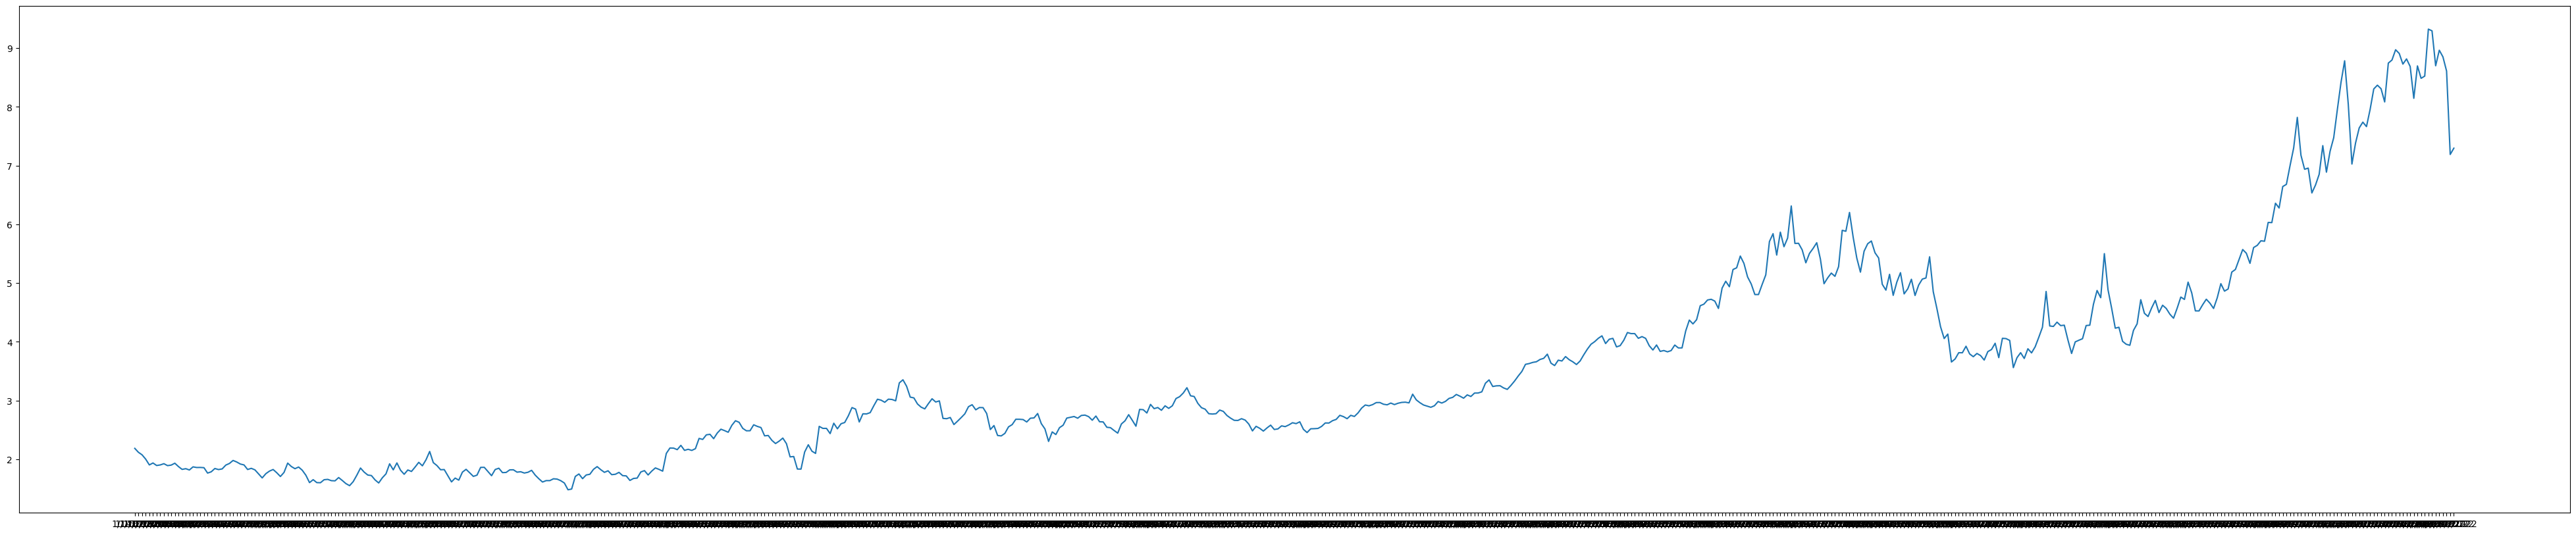

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[50,10])
plot(df['Date'], df['Natural Gas'])
data = df['Natural Gas'].values

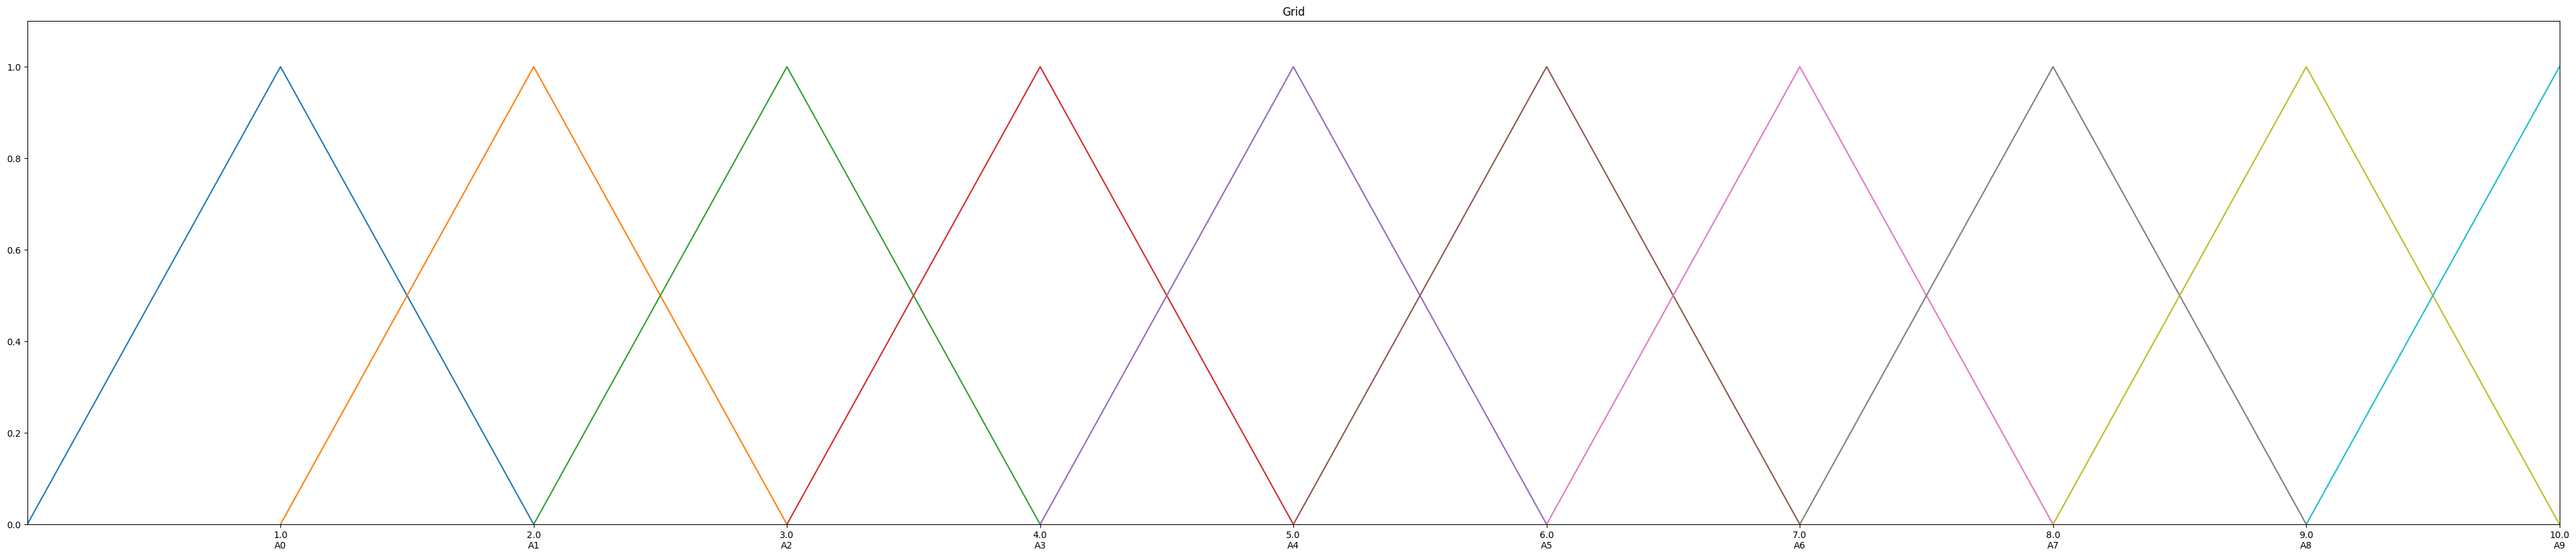

In [ ]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[50,10])

fs.plot(ax)

In [ ]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

In [ ]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8



In [ ]:
fuzzyfied = fs.fuzzyfy(7.2, method='maximum', mode='sets')
print(fuzzyfied)

A6


In [ ]:
model.predict([7.2])

[7.280733333333333]

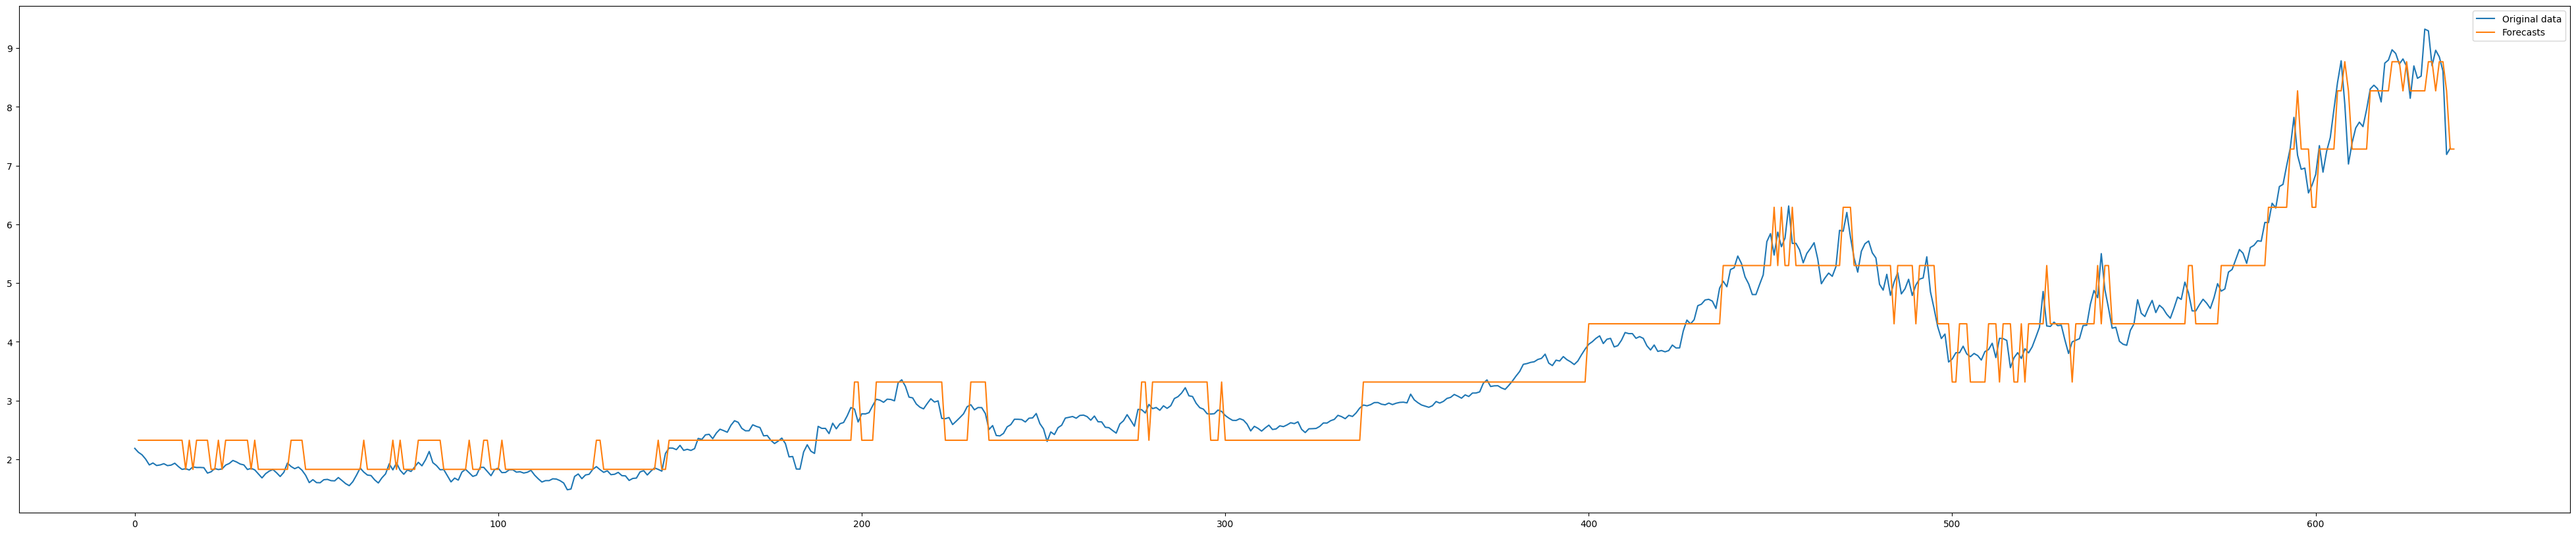

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[50,10])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])